In [405]:
import fastf1 as f1
import fastf1.plotting as f1plt
from matplotlib import pyplot as plt
from matplotlib.ticker import AutoMinorLocator

In [359]:
f1.set_log_level("Warning")
session = f1.get_session(2023, 'Mexico', 'Q')

session.load()

f1.plotting.setup_mpl(misc_mpl_mods=False)

In [432]:
def laptime_to_string(seconds):
    m = int(seconds / 60)
    s = round(seconds % 60, 3)
    return str(m) + ":" + str(s)

In [435]:
def telemetry_graph(session, drivers):
    laps = []
    tels = []
    circuit_info = session.get_circuit_info()
    for driver in drivers:
        laps.append(session.laps.pick_driver(driver).pick_fastest())

    fig, (tel, thr, drs, dif) = plt.subplots(4, 1, sharex=True,figsize=(50,25),
            constrained_layout=True, height_ratios=[1, 0.25, 0.15, 0.25])

    tel_max = 0
    tel_min = 0
    dis_max = 0
    for lap in laps:
        tel_data = lap.get_telemetry()

        tel_max = tel_data['Speed'].max() if tel_max == 0 or tel_max < tel_data['Speed'].max() else tel_max
        tel_min = tel_data['Speed'].min() if tel_min == 0 or tel_min < tel_data['Speed'].min() else tel_min
        dis_max = tel_data['Distance'].max() if dis_max == 0 or dis_max < tel_data['Distance'].max() else dis_max

        drs_data = []
        for drs_status in tel_data['DRS']:
            drs_data.append(1 if drs_status > 9 else 0)

        tel.plot(tel_data['Distance'], tel_data['Speed'], linewidth=3.0, label=lap['Driver'] + " Lap " + str(lap['LapNumber']) + " " + str(lap['Compound']))
        thr.plot(tel_data['Distance'], tel_data['Throttle'], linewidth=3.0,  label=lap['Driver'] + " Lap " + str(lap['LapNumber']) + " " + str(lap['Compound']))
        drs.plot(tel_data['Distance'], drs_data, linewidth=3.0,  label=lap['Driver'] + " Lap " + str(lap['LapNumber']) + " " + str(lap['Compound']))

        tels.append(tel_data)



    dif.plot(
        tels[0]['Distance'] if tels[0]['Distance'].shape[0] < tels[1]['Distance'].shape[0] else tels[1]['Distance'],
        (tels[1]['Time'] - tels[0]['Time']).dropna().dt.total_seconds(),
        color='w')
    
    tel.vlines(x=circuit_info.corners['Distance'], ymin=tel_min-15, ymax=tel_max+15, linestyles=':', colors='grey', linewidth=6)
    for _, corner in circuit_info.corners.iterrows():
        txt = f"{corner['Number']}{corner['Letter']}"
        tel.text(corner['Distance'], tel_min-20, txt,
            va='center_baseline', ha='center', fontsize=20)


    tel.set_ylabel('Speed [Km/h]', fontsize=25)
    tel.set_xticklabels([])
    tel.yaxis.set_minor_locator(AutoMinorLocator())
    tel.tick_params('both', which='major', labelsize=15, length=15)
    tel.tick_params('both', which='minor', length=10)
    tel.legend(fontsize=30)
    tel.grid(True, which='major')
    tel.grid(True, which='minor')

    thr.set_ylabel('Throttle %', fontsize=25)
    thr.set_xticklabels([])
    thr.set_yticks([x*50 for x in range(int(100/50 + 1))], labels=[str(x*50) for x in range(int(100/50 + 1))], fontsize=10)
    thr.tick_params('both', which='major', labelsize=15, length=15)
    thr.tick_params('x', which='minor', length=10)
    thr.grid(True, which='major')
    thr.grid(True, which='minor')

    drs.set_ylabel('DRS', fontsize=25)
    drs.set_yticks([0,1], labels=['0', '1'], fontsize=10)
    drs.tick_params('both', which='major', labelsize=15, length=15)
    drs.tick_params('x', which='minor', length=10)
    drs.grid(True, which='major')
    drs.grid(True, which='minor')

    dif.set_ylabel("<-- " + drivers[1] + " | " + drivers[0] + " -->", fontsize=25)
    dif.xaxis.set_minor_locator(AutoMinorLocator())
    dif.tick_params('both', which='major', labelsize=15, length=15)
    dif.tick_params('x', which='minor', length=10)
    dif.grid(True, which='major')
    dif.grid(True, which='minor')

    fig.suptitle(str(session) + "\n" + drivers[0] + " " + laptime_to_string(laps[0]['LapTime'].total_seconds()) + " vs " + drivers[1] + " " + laptime_to_string(laps[1]['LapTime'].total_seconds()), fontsize=35)

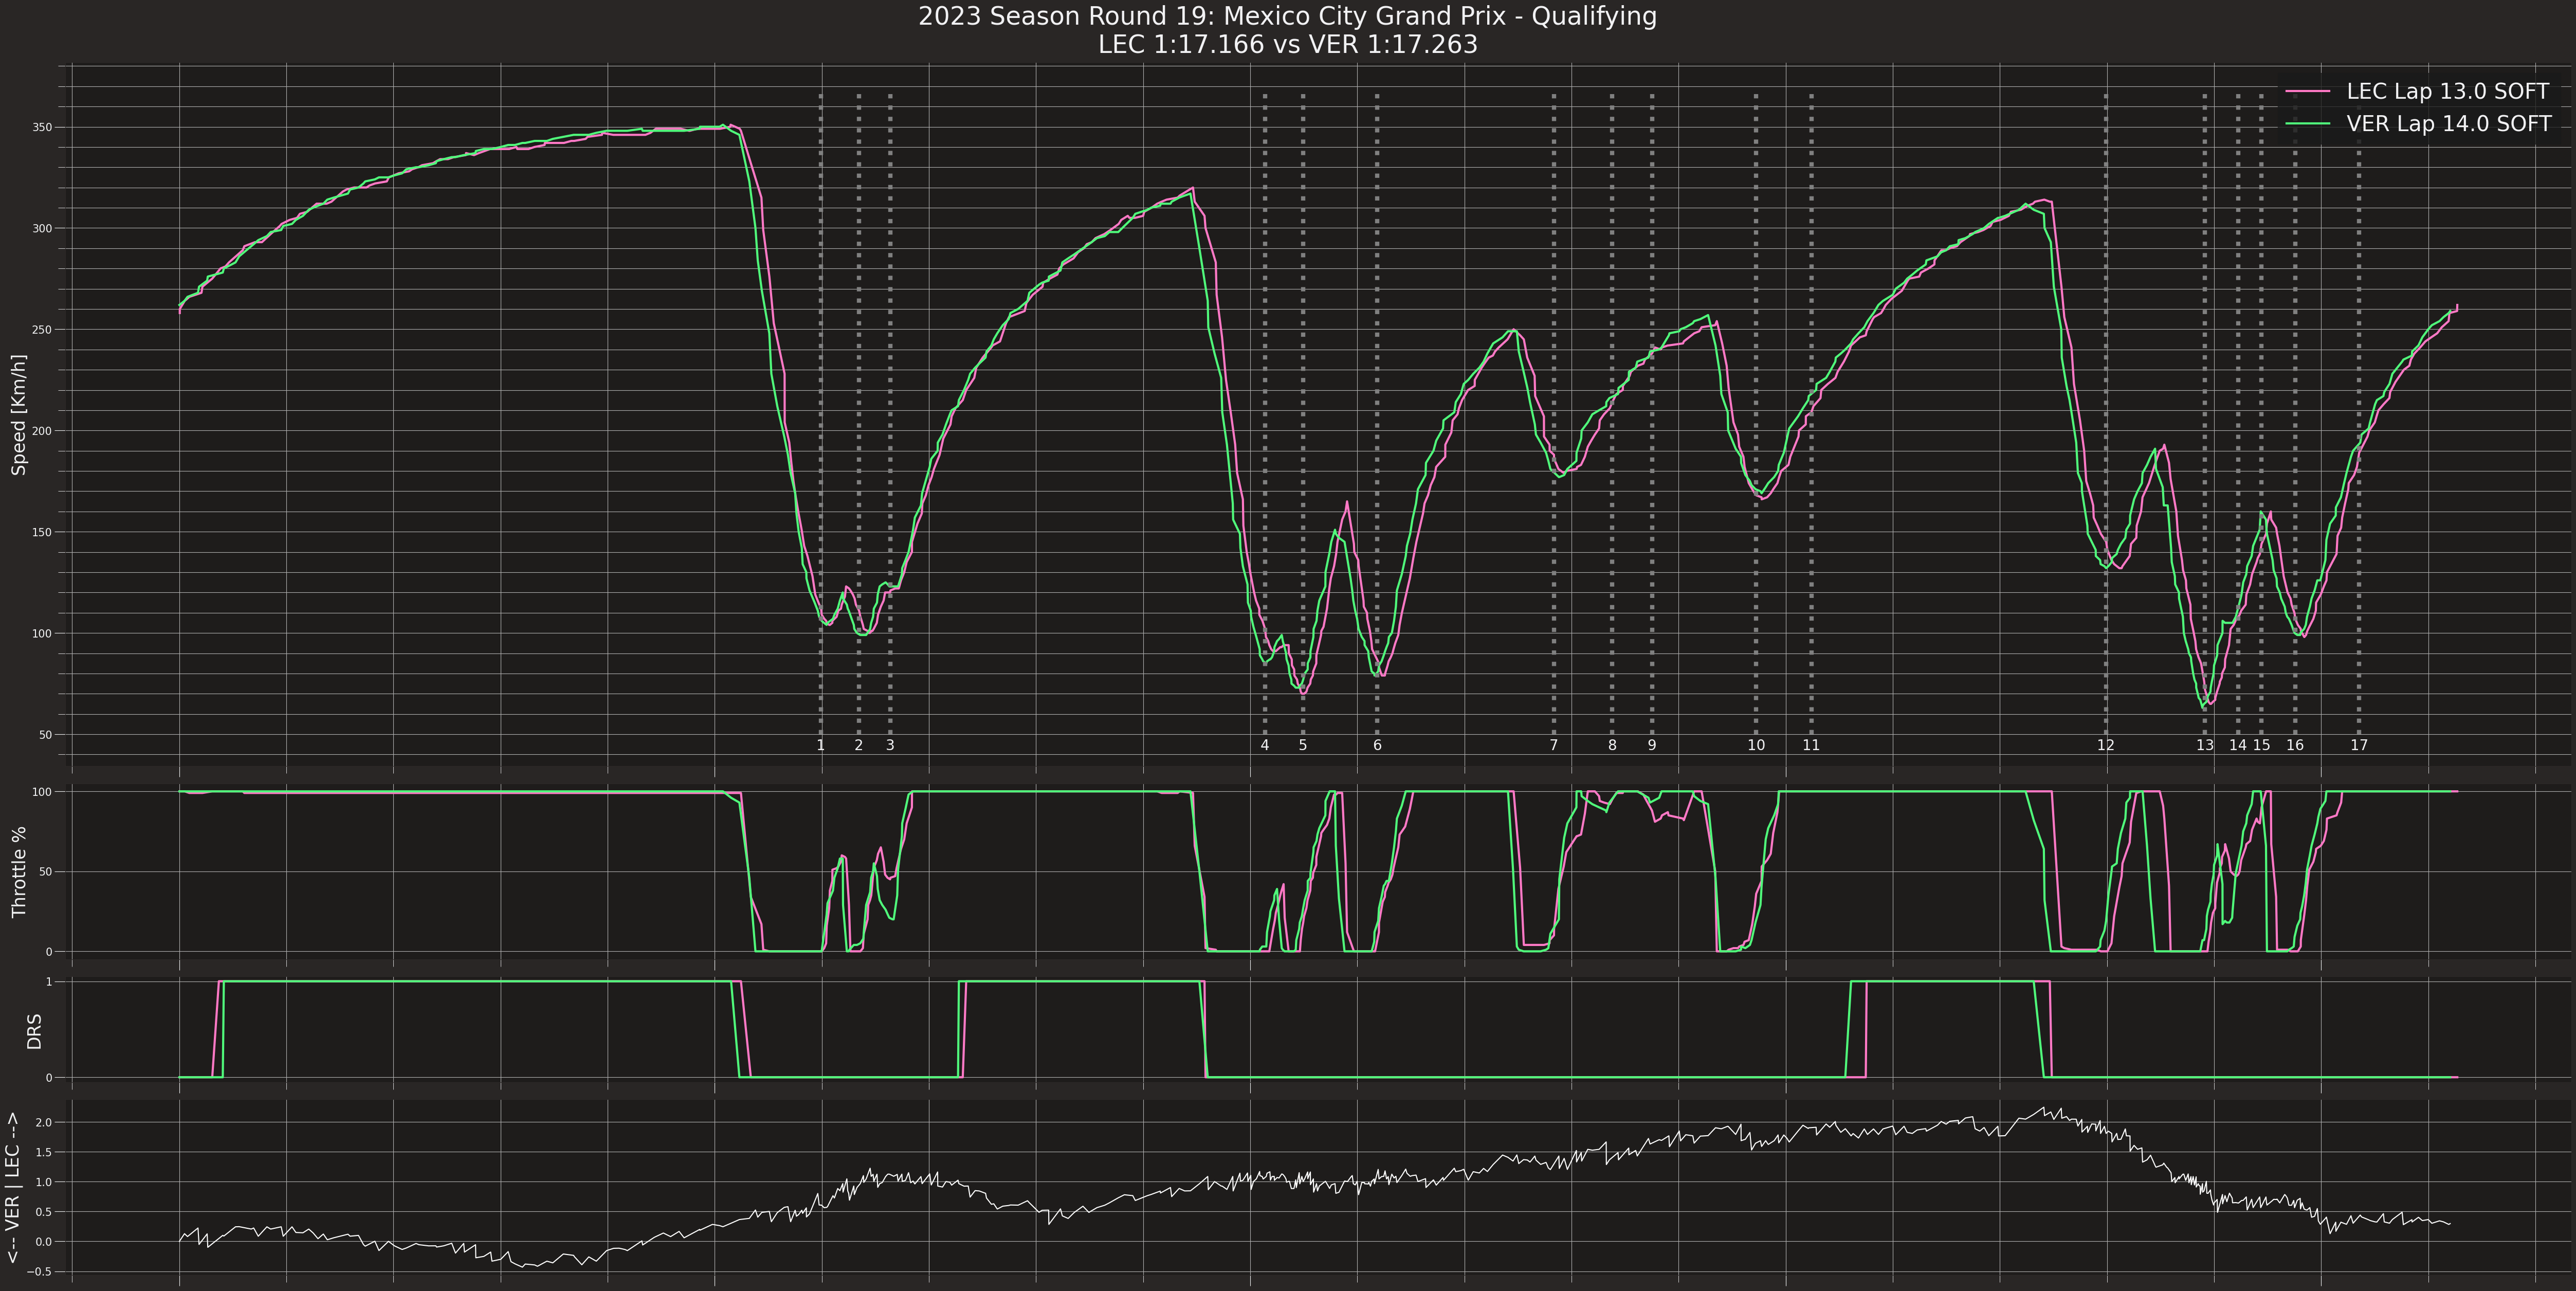

In [436]:
drivers = ['LEC', 'VER']

telemetry_graph(session, drivers)